In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import RobustScaler

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_style(style='darkgrid')

In [2]:
credit_card_df = pd.read_csv('creditcard.csv')

In [3]:
credit_card_df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
credit_card_df.shape

(284807, 31)

In [5]:
credit_card_df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [6]:
print('Number of null values:', credit_card_df.isna().sum().sum())
print('-'*50)
display(credit_card_df.info())

Number of null values: 0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     28

None

In [7]:
display(credit_card_df[['Amount', 'Time']].describe())
print('-'*50)
print('Information on all fraud transactions:')
display(credit_card_df[credit_card_df['Class'] == 1][['Amount', 'Time']].describe())

Amount           Time
count  284807.000000  284807.000000
mean       88.349619   94813.859575
std       250.120109   47488.145955
min         0.000000       0.000000
25%         5.600000   54201.500000
50%        22.000000   84692.000000
75%        77.165000  139320.500000
max     25691.160000  172792.000000

--------------------------------------------------
Information on all fraud transactions:


Amount           Time
count   492.000000     492.000000
mean    122.211321   80746.806911
std     256.683288   47835.365138
min       0.000000     406.000000
25%       1.000000   41241.500000
50%       9.250000   75568.500000
75%     105.890000  128483.000000
max    2125.870000  170348.000000

In [8]:
y = credit_card_df['Class']
X = credit_card_df.drop(y.name, axis=1)

In [9]:
y.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

[{<ufunc 'sqrt'>: 2.8222631528102635}, {<ufunc 'cbrt'>: 1.495629316102277}, {<ufunc 'log1p'>: 0.1627029277416401}]


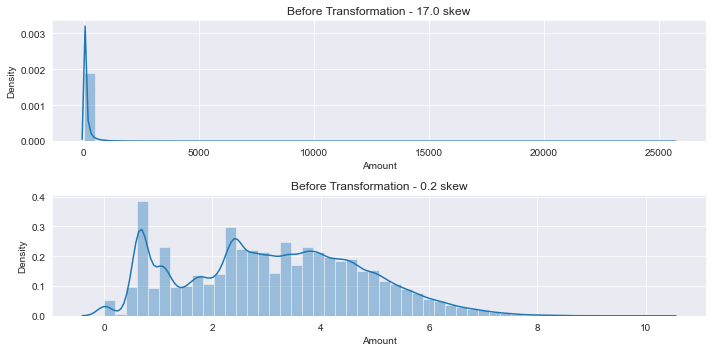

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[10, 5])
sns.distplot(X['Amount'], ax=ax1).set_title('Before Transformation - {:.1f} skew'.format(X['Amount'].skew()))

skews = []
for trans in [np.sqrt, np.cbrt, np.log1p]:
    skews.append({trans: X['Amount'].apply(trans).skew()})
print(skews)

X_trans = X.copy()
X_trans['Amount'] = X['Amount'].apply(np.log1p)
sns.distplot(X_trans['Amount'], ax=ax2).set_title('Before Transformation - {:.1f} skew'.format(X_trans['Amount'].skew()))
plt.tight_layout()
plt.show()

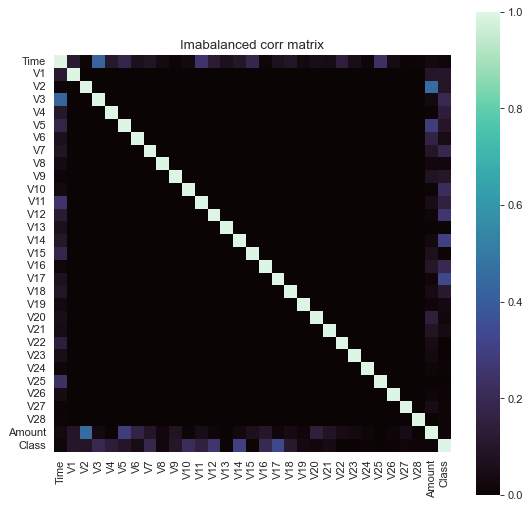

In [11]:
plt.figure(figsize=[8, 8], dpi=80)
sns.heatmap(pd.concat([X_trans, y], axis=1).corr().abs(), square=True, cmap='mako').set_title('Imabalanced corr matrix')
plt.show()

In [12]:
X_resample_under, y_resample = NearMiss(n_jobs=-1).fit_resample(X_trans, y)

In [13]:
print('New shape of the DataFrame:', X_resample_under.shape)
print('-'*50)
print('Distribution of a new target class:')
y_resample.value_counts()

New shape of the DataFrame: (984, 30)
--------------------------------------------------
Distribution of a new target class:


0    492
1    492
Name: Class, dtype: int64

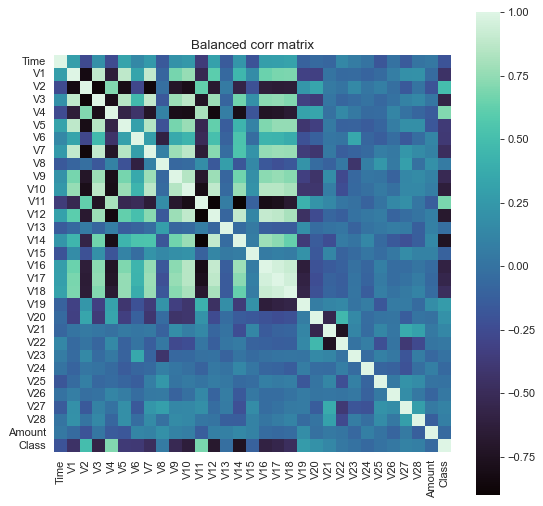

In [14]:
temp_df = pd.concat([X_resample_under, y_resample], axis=1)
plt.figure(figsize=[8, 8], dpi=80)
sns.heatmap(temp_df.corr(), square=True, cmap='mako').set_title('Balanced corr matrix')
plt.show()

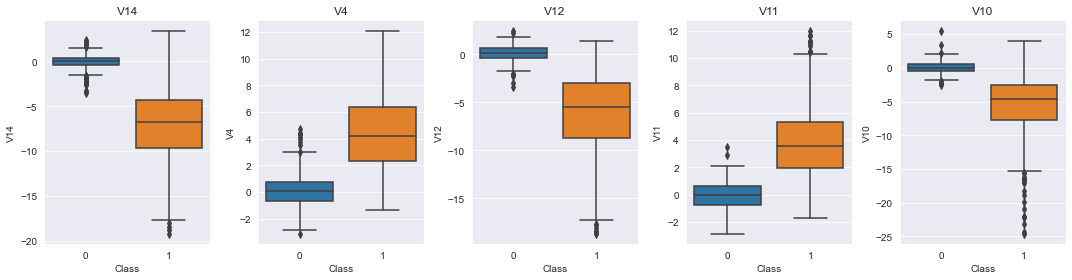

In [15]:
corr_columns = [
    temp_df.corr().abs()['Class'].sort_values(ascending=False).index[i] 
    for i in range(1, 6)]

fig, ax = plt.subplots(ncols=len(corr_columns), figsize=[15, 4])

[sns.boxplot(x='Class', y=column, data=temp_df, ax=ax).set_title(column) for column, ax in zip(corr_columns, ax)]
plt.tight_layout()
plt.show()

In [16]:
scaler = RobustScaler()
X_resample_under = scaler.fit_transform(X_resample_under)

In [17]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_jobs=-1, random_state=42).fit_transform(X_resample_under)

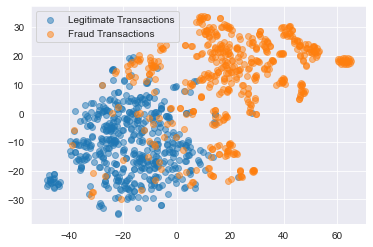

(<matplotlib.legend.Legend at 0x7fce039aa580>, None)

In [18]:
tsne_df = pd.concat([pd.DataFrame(X_tsne), y_resample], axis=1)
legit = tsne_df[tsne_df['Class'] == 0]
plt.scatter(legit[0], legit[1], label='Legitimate Transactions', alpha=0.5)
fraud = tsne_df[tsne_df['Class'] == 1]
plt.scatter(fraud[0], fraud[1], label='Fraud Transactions', alpha=0.5)
plt.legend(), plt.show()

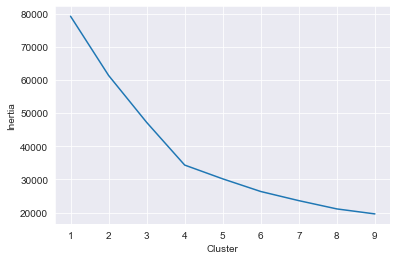

In [19]:
from sklearn.cluster import KMeans

inertia = []
clusters = range(1, 10)
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_jobs=-1, random_state=42)
    kmeans.fit(X_resample_under)
    inertia.append(kmeans.inertia_)
    
plt.plot(clusters, inertia)
plt.xlabel('Cluster'), plt.ylabel('Inertia')
plt.show()

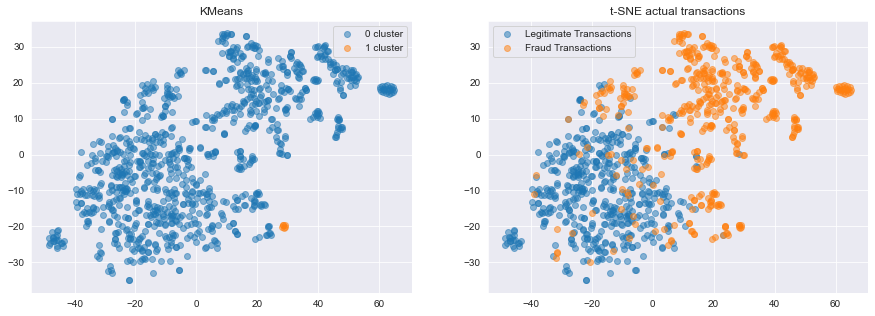

In [20]:

fig, ax = plt.subplots(1, 2, figsize=[15, 5])

"""----------------Kmeans----------------"""
kmeans = KMeans(n_clusters=2, n_jobs=-1, random_state=42)
kmeans.fit(X_resample_under)
ax[0].set_title('KMeans')
tsne_df['KMeans'] = kmeans.labels_
for cluster in range(kmeans.labels_.min(), kmeans.labels_.max()+1):
    legit = tsne_df[tsne_df['KMeans'] == cluster]
    ax[0].scatter(legit[0], legit[1], label='{} cluster'.format(cluster), alpha=0.5)
ax[0].legend()

"""----------------Actual----------------"""
legit = tsne_df[tsne_df['Class'] == 0]
ax[1].scatter(legit[0], legit[1], label='Legitimate Transactions', alpha=0.5)
fraud = tsne_df[tsne_df['Class'] == 1]
ax[1].scatter(fraud[0], fraud[1], label='Fraud Transactions', alpha=0.5)
ax[1].set_title('t-SNE actual transactions')
ax[1].legend()

plt.show()

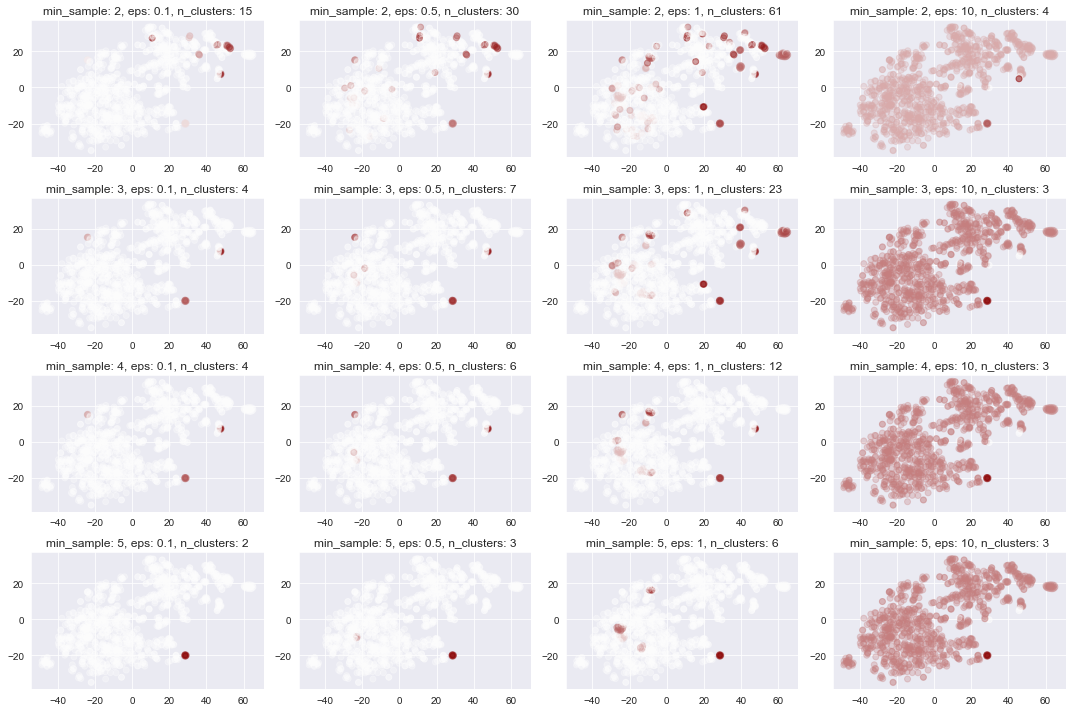

In [21]:
from sklearn.cluster import DBSCAN
import matplotlib as mpl

cmap = mpl.colors.LinearSegmentedColormap.from_list('white_to_red', ['white', 'darkred'])

epss = [0.1, 0.5, 1, 10]
min_samples = [2, 3, 4, 5]

fig, ax = plt.subplots(4, 4, figsize=[15, 10])

for row, min_sample in enumerate(min_samples):
    for column, eps in enumerate(epss):
        dbs = DBSCAN(n_jobs=-1, eps=eps, min_samples=min_sample)
        dbs.fit(X_resample_under)
        predicted_cluster = dbs.labels_
        palette = sns.color_palette("flare", as_cmap=True, n_colors=len(np.unique(dbs.labels_)))
        ax[row, column].set_title('min_sample: {}, eps: {}, n_clusters: {}'.format(min_sample, eps, len(np.unique(dbs.labels_))))
        ax[row, column].scatter(tsne_df[0], tsne_df[1], c=predicted_cluster, cmap=cmap, alpha=0.3)

plt.tight_layout()
plt.show()

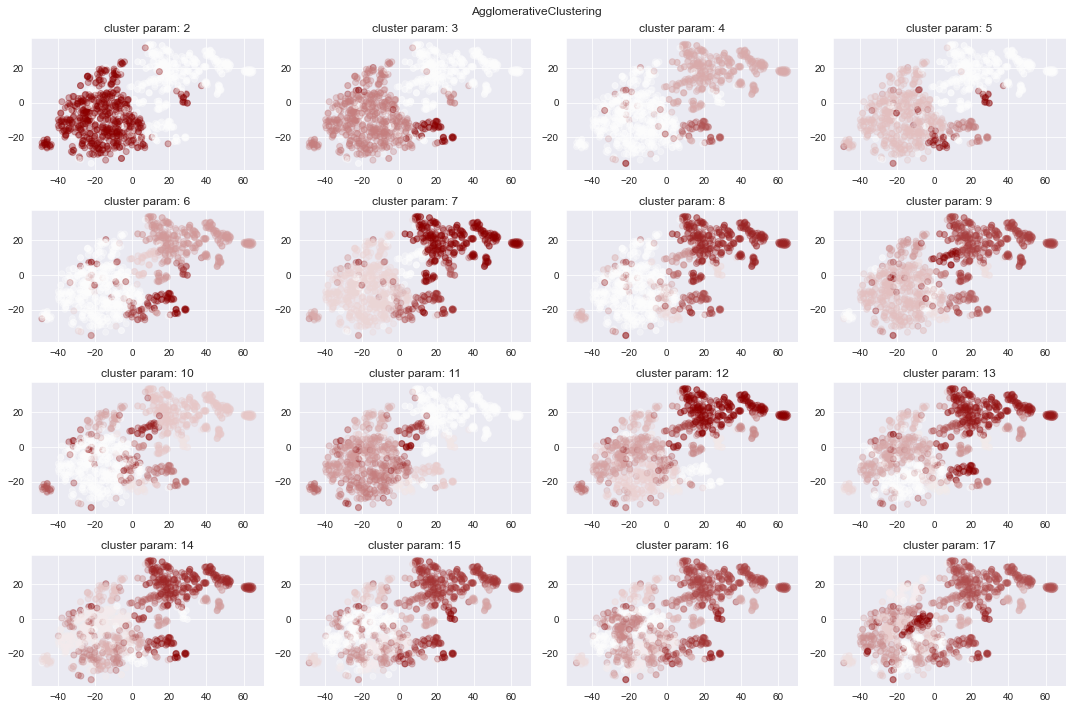

In [22]:
from sklearn.cluster import AgglomerativeClustering

fig, ax = plt.subplots(4, 4, figsize=[15, 10])
plt.suptitle('AgglomerativeClustering')
cluster = 2
for row in range(4):
    for column in range(4):
        agglo = AgglomerativeClustering(n_clusters=cluster, affinity='cosine', linkage='average')
        predicted_cluster = agglo.fit_predict(X_resample_under)
        palette = sns.color_palette("flare", as_cmap=True, n_colors=len(np.unique(dbs.labels_)))
        ax[row, column].set_title('cluster param: {}'.format(cluster))
        ax[row, column].scatter(tsne_df[0], tsne_df[1], c=predicted_cluster, cmap=cmap, alpha=0.3)
        cluster+=1

plt.tight_layout()
plt.show()

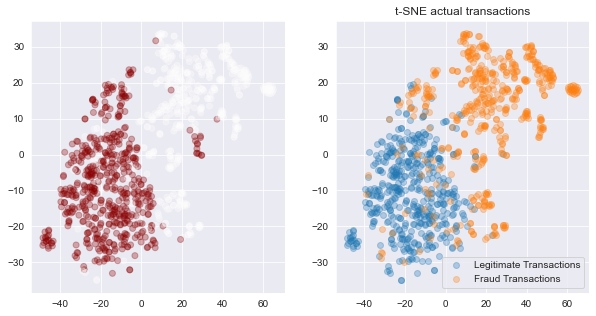

In [23]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5])

"""---AgglomerativeClustering----"""
agglo = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
predicted_cluster = agglo.fit_predict(X_resample_under)
ax[0].scatter(tsne_df[0], tsne_df[1], c=predicted_cluster, cmap=cmap, alpha=0.3)

"""---Actual---"""
ax[1].scatter(legit[0], legit[1], label='Legitimate Transactions', alpha=0.3)
ax[1].scatter(fraud[0], fraud[1], label='Fraud Transactions', alpha=0.3)
ax[1].set_title('t-SNE actual transactions')
ax[1].legend()

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000).fit(X_resample_under, predicted_cluster)

In [25]:
X_val = scaler.transform(credit_card_df.drop(['Class'], axis=1))
y_val = credit_card_df['Class']

In [26]:
y_pred = log_reg.predict(X_val)

In [27]:
from collections import Counter
Counter(y_pred)

Counter({1: 275919, 0: 8888})

In [28]:
def transformation(x):
    if x == 1:
        return 0
    if x == 0:
        return 1

y_pred = pd.Series(y_pred).apply(lambda x: transformation(x))

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    275919
           1       0.51      0.03      0.05      8888

    accuracy                           0.97    284807
   macro avg       0.74      0.51      0.52    284807
weighted avg       0.96      0.97      0.96    284807



In [44]:
# create a synthetic data set with continuous and categorical features
rng = np.random.RandomState(42)
n_samples = 50
X = np.empty((n_samples, 3), dtype=object)
X[:, 0] = rng.choice(['A', 'B', 'C'], size=n_samples).astype(object)
X[:, 1] = rng.randn(n_samples)
X[:, 2] = rng.randint(3, size=n_samples)
y = np.array([0] * 20 + [1] * 30)
print(sorted(Counter(y).items()))

from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

print(Counter(X_resampled[:, 2]))
X

[(0, 20), (1, 30)]
[(0, 30), (1, 30)]
Counter({2: 28, 1: 16, 0: 16})


array([['C', -0.14021849735700803, 2],
       ['A', -0.033193400066544886, 2],
       ['C', -0.7490765234433554, 1],
       ['C', -0.7783820070908942, 2],
       ['A', 0.948842857719016, 2],
       ['A', 1.580850586039026, 0],
       ['C', -0.3681709413435413, 2],
       ['B', 0.375564633840694, 2],
       ['C', -1.1931582294890923, 1],
       ['C', -0.4090519017239313, 1],
       ['C', -0.44674147097314604, 0],
       ['C', 1.5242416328552062, 2],
       ['A', 0.3229997972782976, 2],
       ['C', -1.3934169408727037, 2],
       ['B', -2.1783342468237086, 0],
       ['A', -1.043896408234835, 0],
       ['B', 0.17269370652551178, 1],
       ['B', 0.32419876755273175, 0],
       ['B', 0.7458595418254313, 2],
       ['B', -1.8365832393175525, 2],
       ['A', 0.5644642385551357, 0],
       ['A', 0.025500668081348373, 2],
       ['B', 0.4731932494600233, 2],
       ['B', 0.6591905984289843, 0],
       ['A', 2.3407463341030463, 0],
       ['A', 1.070985187017369, 2],
       ['A', 0.09641647